# Distribution of minimum number of SECs for random instances

In this notebook, we will analyze the distribution of the minimum number of SECs for random instances. 
We analyzed three types of random instances:
- Random instances where the costs are drawn at random from a uniform distribution (non metric)
- Random instances where the costs are drawn at random from an exponential distribution (non metric)
- Random instances in the euclidean plane where the points are drawn at random from a uniform distribution (metric)
The behavior of the minimum number of SECs is quite different for these three types of random instances and will be analyzed using boxplots.

First we import the necessary libraries as well as the function for generating random instances.

In [1]:
from utils import sample
from ialg import ialg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Random instances where the costs are drawn at random from a uniform distribution

In [9]:
n_min = 10
n_max = 100 # You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100 # This is the value we used in the paper
# With the parameters in the paper, it should run for less than 20minutes.

In [ ]:
out = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(n*i) # To ensure reproducibility
        # Sample n points in the unit square
        G = sample(n, "uniform")
        S_family, S_num, partitions, max_comp, runtime = ialg(G) # Here, we do not use verbosity, as the line printed will be too many
        out[n].append((S_family, S_num, partitions, max_comp, runtime))

### Minimum number of subtour elimination constraints to prove optimality.

First, we analyze the empirical distribution of the minimum number of SECs needed to prove optimality. We do it trough boxplots

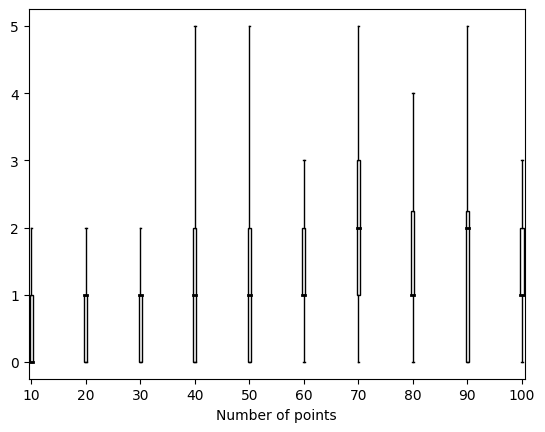

In [11]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = [y[1] for y in out[n]]
    # Make a boxplot ouf of x
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False) # Just to make the boxplot more readable
    ## This part of code can ignored, but we used it for the tkiz plot
    #median = np.median(x)
    #Q1 = np.percentile(x, 25)
    #Q3 = np.percentile(x, 75)
    #IQR = Q3 - Q1
    #LW = Q1 - 1.5*IQR
    #UW = Q3 + 1.5*IQR
    #print(f"\\addplot+ [thick, boxplot prepared={{lower whisker={max(0, LW)}, lower quartile={Q1},median={median}, upper quartile={Q3},upper whisker={UW}}}] coordinates {{}};")
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=2)
plt.xlabel('Number of points')
plt.show()

### Trend of $c$ vs $c'$

In this part, we want to assess the impact of the flag `minimalize` when setting to either `True` or `False`. 

The previous part of the expriments was done using `minimalize=True`, so the only part left to analyze is `minimalize=False`.

In [12]:
n_min = 10
n_max = 100
step = 10
n_samples_for_each_n = 100

In [ ]:
out_minimalize_False = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out_minimalize_False[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(n*i) # To ensure reproducibility
        # Sample n points in the unit square
        G = sample(n, "uniform")
        S_family, S_num, partitions, max_comp, runtime = ialg(G, minimalize=False)
        out_minimalize_False[n].append((S_family, S_num, partitions, max_comp, runtime))

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 9/10 [05:10<01:05, 65.71s/it]

Note that, globally, the procedure take more less time when minimalize is equal to `False`

We report the distribution of $c'$ and $c$ as two side-by-side boxplots

In [ ]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = [y[3] for y in out[n]]
    x_minimalize_False = [y[3] for y in out_minimalize_False[n]]
    # Make a boxplot ouf of x
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False)
    bp_minimalize_False = plt.boxplot(x_minimalize_False, vert=True, patch_artist=True, positions=[n + 1], widths=0.6, showfliers=False)
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=1)
    for patch in bp_minimalize_False['boxes']:
        patch.set_facecolor('gray')
        patch.set_edgecolor('black')
        for median in bp_minimalize_False['medians']:
            median.set(color='black', linewidth=1)
plt.xlabel('Number of points')
plt.legend(["c", "c'"], )
plt.show()

## Random instances where the costs are drawn at random from an exponential distribution

In [ ]:
n_min = 10
n_max = 100 # You can increase this value as you want, but it will take more time
step = 10
n_samples_for_each_n = 100 # This is the value we used in the paper

In [ ]:
out = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(n*i) # To ensure reproducibility
        # Sample n points in the unit square
        G = sample(n, "uniform")
        S_family, S_num, partitions, max_comp, runtime = ialg(G) # Here, we do not use verbosity, as the line printed will be too many
        out[n].append((S_family, S_num, partitions, max_comp, runtime))

In [ ]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = out[n]
    # Make a boxplot ouf of x
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False) # Just to make the boxplot more readable
    #This part of code can ignored, but we used for the tkiz plot
    median = np.median(x)
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5*IQR
    UW = Q3 + 1.5*IQR
    print(f"\\addplot+ [thick, boxplot prepared={{lower whisker={max(0, LW)}, lower quartile={Q1},median={median}, upper quartile={Q3},upper whisker={UW}}}] coordinates {{}};")
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=2)
plt.xlabel('Number of points')
plt.ylabel('Number of SECs')
plt.show()

## Random instances in the euclidean plane where the points are drawn at random from a uniform distribution

In this case, run the `ialg` algorithm on bigger instances is much harder. Hence, we will analyze the distribution of the minimum number of SECs for smaller instances.

In [ ]:
n_min = 10
n_max = 15 # You can increase this value as you want, but it will take more time
step = 1
n_samples_for_each_n = 60 # This is the value we used in the paper

In [ ]:
out = {}
for n in tqdm(range(n_min, n_max + 1, step)):
    out[n] = []
    for i in range(n_samples_for_each_n):
        np.random.seed(n*i) # To ensure reproducibility
        # Sample n points in the unit square
        G = sample(n, "uniform_points_in_unit_square")
        S_family, S_num = ialg(G) # Here, we do not use verbosity, as the line printed will be too much
        out[n].append(S_num)

In [ ]:
plt.figure()
for n in range(n_min, n_max + 1, step):
    x = out[n]
    # Make a boxplot ouf of x
    bp = plt.boxplot(x, vert=True, patch_artist=True, positions=[n], widths=0.6, showfliers=False) # Just to make the boxplot more readable
    #This part of code can ignored, but we used for the tkiz plot
    #median = np.median(x)
    # Q1 = np.percentile(x, 25)
    # Q3 = np.percentile(x, 75)
    # IQR = Q3 - Q1
    # LW = Q1 - 1.5*IQR
    # UW = Q3 + 1.5*IQR
    #print(f"\\addplot+ [thick, boxplot prepared={{lower whisker={max(0, LW)}, lower quartile={Q1},median={median}, upper quartile={Q3},upper whisker={UW}}}] coordinates {{}};")
    for patch in bp['boxes']:
        patch.set_facecolor('white')
        patch.set_edgecolor('black')
        for median in bp['medians']:
            median.set(color='black', linewidth=2)
plt.xlabel('Number of points')
plt.ylabel('Number of SECs')
plt.show()